In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
df = pd.read_csv(r"C:\Users\BIADI\Desktop\First\third\fcc-forum-pageviews.csv",parse_dates=['date'],index_col='date')

In [5]:
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]

Text(0, 0.5, 'Page Views')

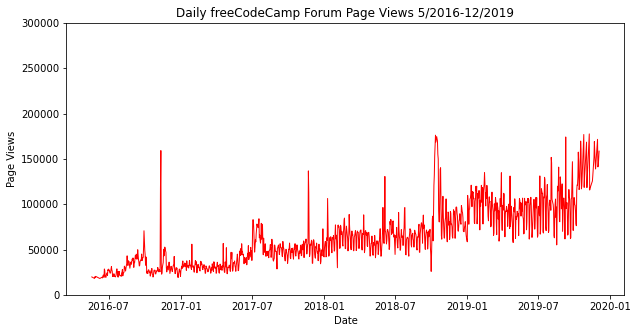

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df['value'],'r',linewidth=1)
plt.ylim([0, 300000])
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel( "Page Views")

In [10]:
df["month"]=df.index.month
df["year"]=df.index.year
df_bar=df.groupby(["year","month"])["value"].mean()
df_bar=df_bar.unstack()



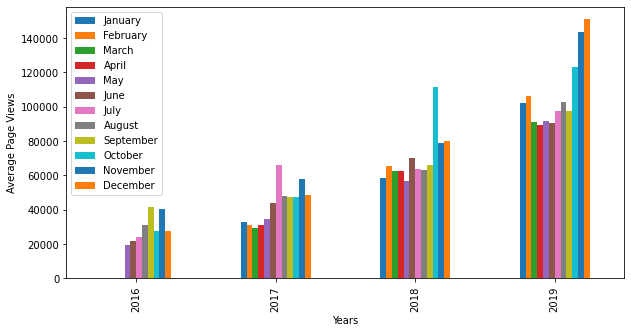

In [6]:
fig=df_bar.plot.bar(legend=True,figsize=(10,5),ylabel="Average Page Views",xlabel= "Years").figure
plt.legend(["January","February","March","April","May","June","July","August","September","October","November","December"])

Text(0, 0.5, 'Page Views')

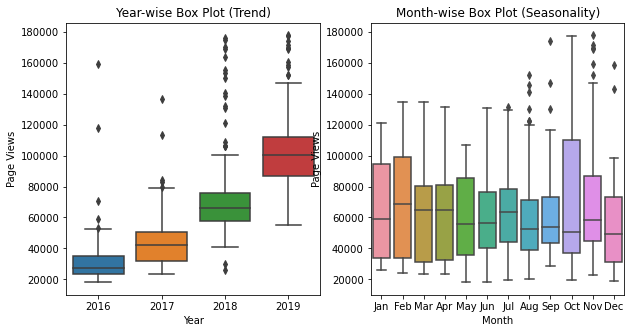

In [11]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
df_box["month_num"]=df_box["date"].dt.month
df_box=df_box.sort_values("month_num")
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0]=sns.boxplot(x=df_box["year"],y=df_box["value"],ax=axes[0])
axes[1]=sns.boxplot(x=df_box["month"],y=df_box["value"],ax=axes[1])

axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")
